In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
import os

path = os.listdir('/brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [8]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [9]:
X = np.array(X)
Y = np.array(Y)

In [10]:
np.unique(Y)

array([0, 1])

In [11]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [12]:
X.shape

(1222, 200, 200)

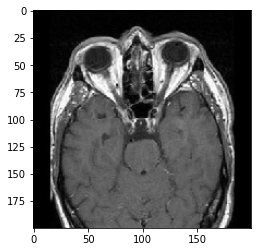

In [13]:
plt.imshow(X[0], cmap='gray')

In [14]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [16]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [17]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [18]:
from sklearn.decomposition import PCA

In [19]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [22]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [23]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [24]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [25]:
pred[36]

0

In [26]:
ytest[36]

1

In [27]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

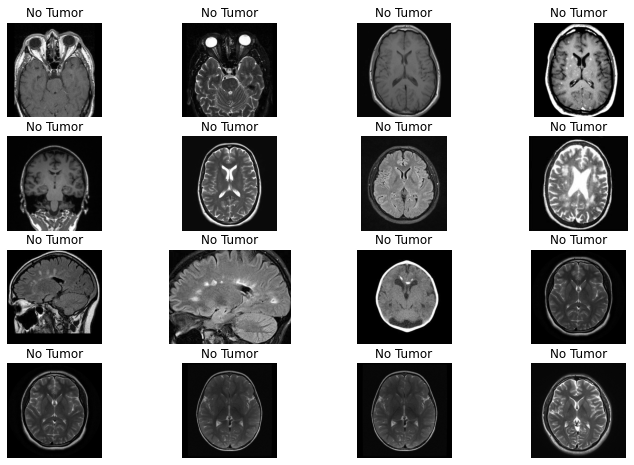

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('/brain_tumor/Training/')
c=1
for i in os.listdir('/brain_tumor/Training/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/brain_tumor/Training/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

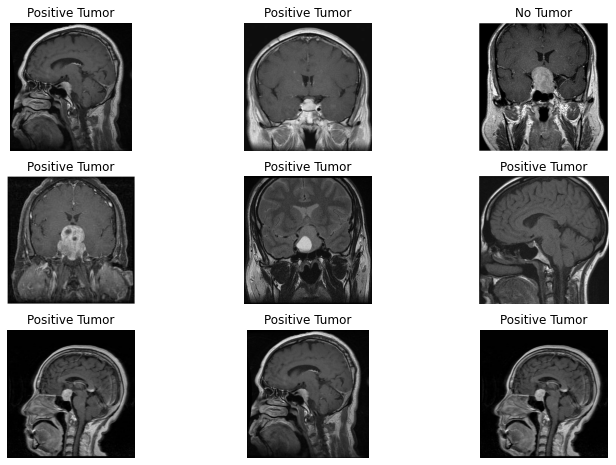

In [29]:
plt.figure(figsize=(12,8))
p = os.listdir('/brain_tumor/Testing/')
c=1
for i in os.listdir('/brain_tumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [30]:
# apply Logistic Regression
 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
 
# implemented our model through logistic regression
y_pred = lr.predict(xtest)
y_pred
 
# array containing the actual output
ytest

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1])

In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

0.9591836734693877


In [56]:
#Decision Tree

In [59]:
# apply Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
 
y_pred = dtc.predict(xtest)
y_pred
 
print(accuracy_score(ytest, y_pred))
 


0.9591836734693877


In [60]:
#Random Forest

In [62]:
# apply Random Forest Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
 
y_pred = rfc.predict(xtest)
y_pred
 
print(accuracy_score(ytest, y_pred))

0.9755102040816327


In [63]:
#SVM

In [74]:
# apply Support Vector Machine
from sklearn import svm
svc = svm.SVC()
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
y_pred



array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

0.963265306122449
